In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
import numpy as np


In [14]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [15]:
df['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(float)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


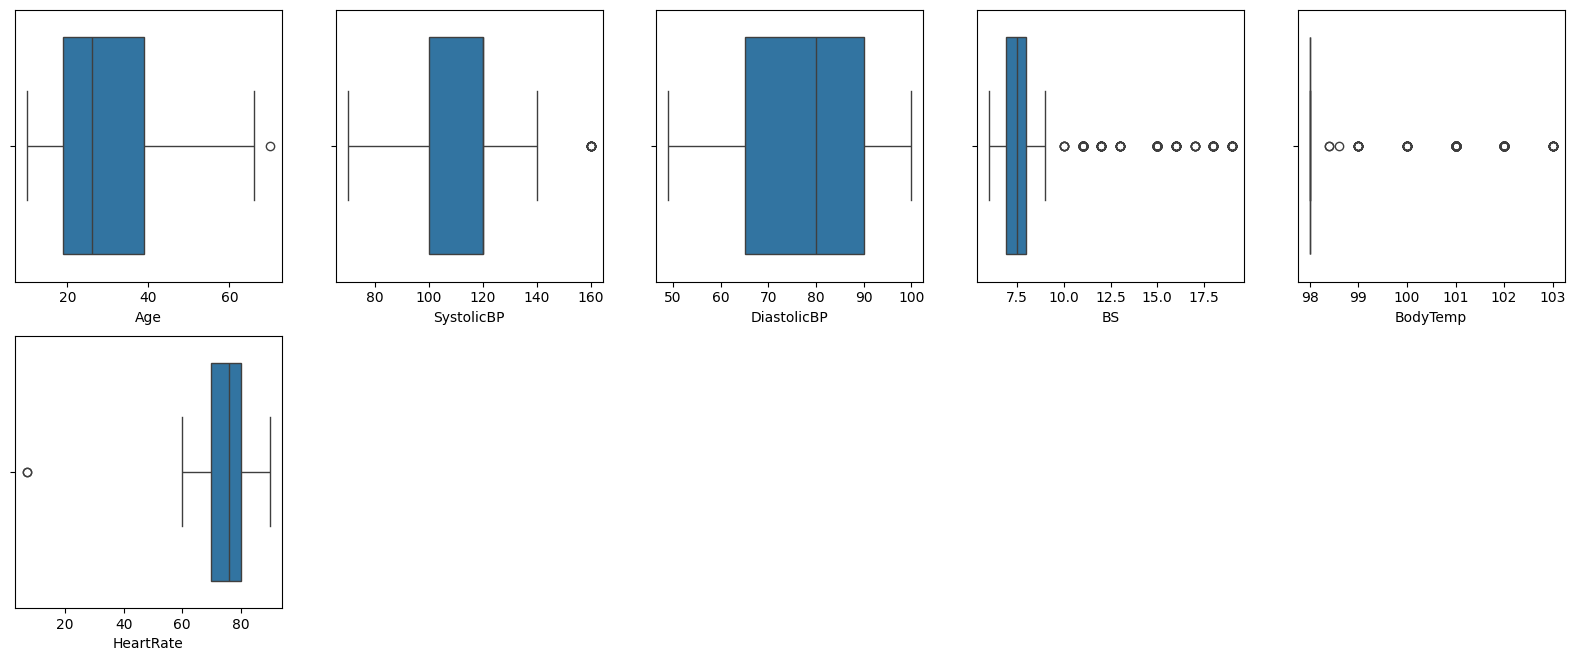

In [16]:
cols = [i for i in df.columns]
cols = [i for i in cols if i not in ['RiskLevel']]
plt.figure(figsize=(20,12))
for i in enumerate(cols): 
    num = i[0]+1
    plt.subplot(3,5,num)
    sns.boxplot(data=df, x=i[1])
plt.show()

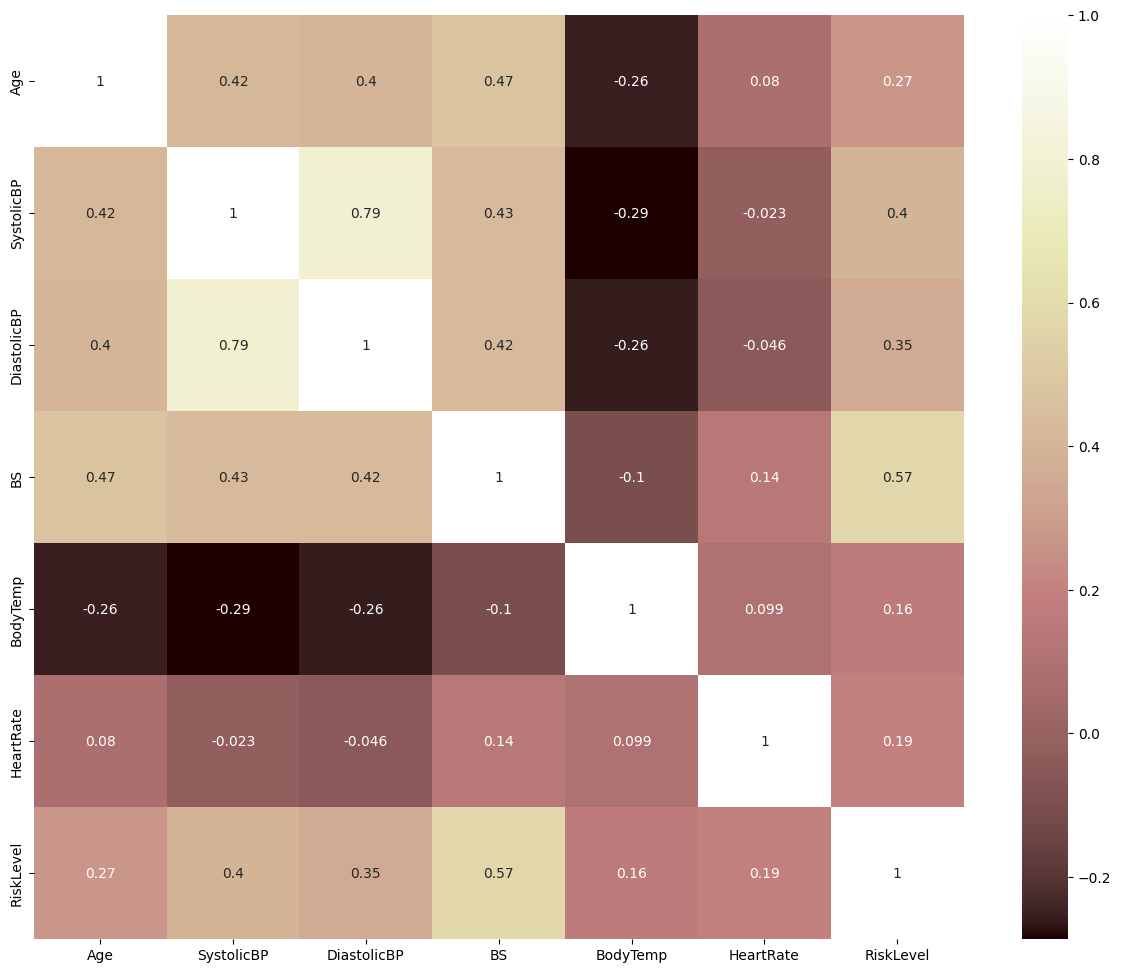

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='pink')
plt.show()

In [18]:
train, test = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 811
No. of testing examples: 203


In [19]:
y_test=test['RiskLevel']
x_test=test.drop('RiskLevel', axis=1)
x_test.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
805,19,120,80,7.0,98.0,70
298,23,90,60,7.7,98.0,76
243,32,120,65,6.0,101.0,76
262,40,160,100,19.0,98.0,77
61,15,80,60,7.0,98.0,80


In [20]:
#Setting training data into x_train and y_train
x_train=train.drop('RiskLevel',axis=1)
y_train=train['RiskLevel']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape

((811, 6), (811,), (203, 6))

In [21]:
#Random Forest Regression
random_model=RandomForestRegressor(n_estimators=50)
random_model.fit(x_train,y_train)
print("The accuracy : " , random_model.score(x_train,y_train))

#Making predictions on test set 
random_predict=random_model.predict(x_test)

random_result=pd.DataFrame({'Id':test.index,'Predicted Risk':random_predict,'Actual Risk':y_test})
print(random_result)

The accuracy :  0.8960712158273333
      Id  Predicted Risk  Actual Risk
805  805        1.862926          2.0
298  298        1.000000          1.0
243  243        2.020000          2.0
262  262        3.000000          3.0
61    61        1.140000          1.0
..   ...             ...          ...
550  550        2.861768          2.0
578  578        2.364285          3.0
698  698        1.160000          1.0
231  231        3.000000          3.0
505  505        1.000000          1.0

[203 rows x 3 columns]


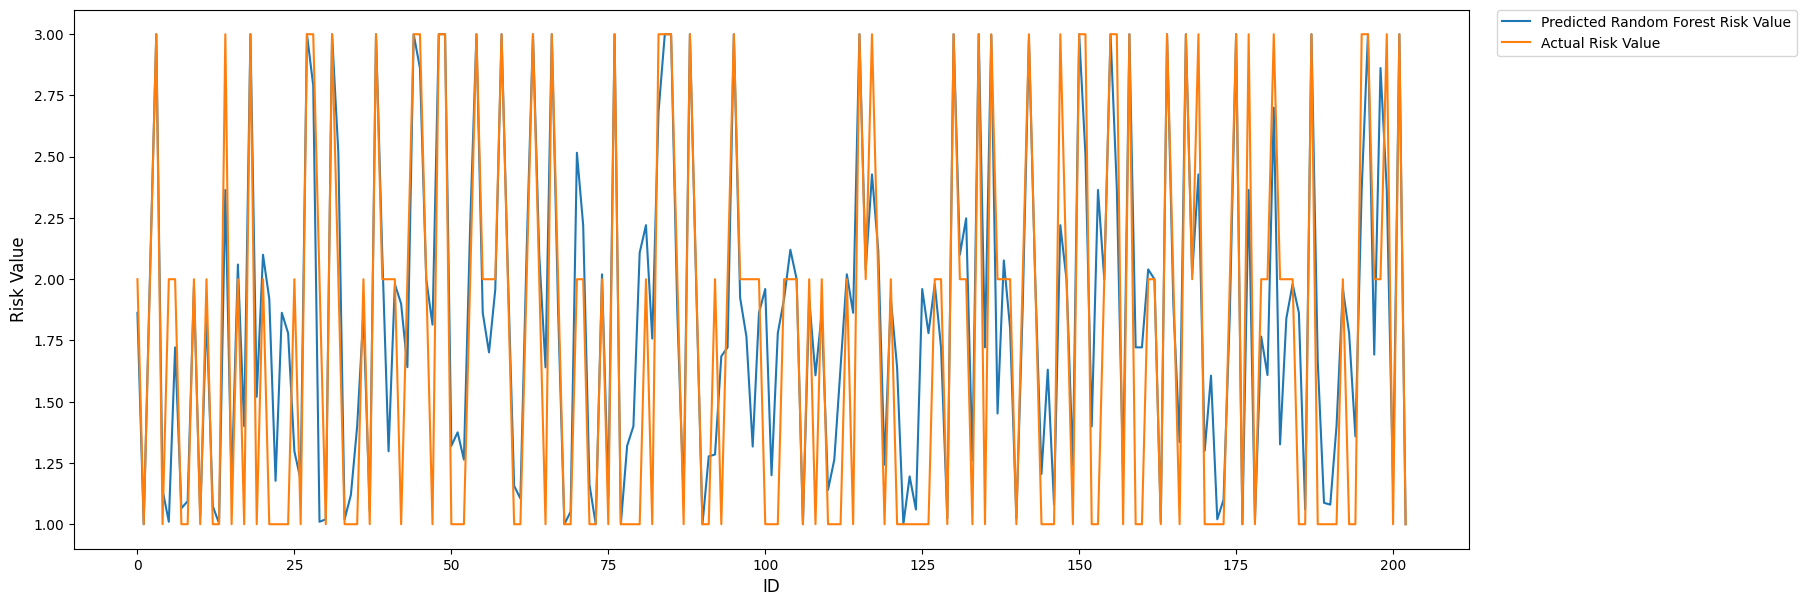

In [22]:
plt.figure(figsize=(18,7))
ax=sns.lineplot(x=np.arange(0,len(random_predict)),y=random_predict,label = 'Predicted Random Forest Risk Value')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Risk Value')
ax.set_xlabel('ID',fontsize=12)
ax.set_ylabel('Risk Value',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
plt.legend(prop={'size':'15'})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


In [24]:
import joblib

# Save the model to a file
joblib.dump(random_model, 'random_forest_pregnancy_risk_model.pkl')


['random_forest_pregnancy_risk_model.pkl']

**Let us try KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

knn_classifier = KNeighborsClassifier(n_neighbors=3) # testing with 3 neighbors

knn_classifier.fit(x_train, y_train)

knn_predictions = knn_classifier.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy of KNN classifier:", accuracy)


Accuracy of KNN classifier: 0.7339901477832512


In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 21),  # Test neighbors from 1 to 20
    'weights': ['uniform', 'distance'],  # Different weight options
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm options
    'leaf_size': [10, 20, 30, 40, 50],  # Leaf size options
    'p': [1, 2]  # Distance metric options (1 for Manhattan distance, 2 for Euclidean distance)
}

# Instantiate the KNN classifier
knn_classifier = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(x_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)


Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
Best accuracy: 0.8051427705824434


**SVM**

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


svm_classifier = SVC(kernel='poly')  
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy of SVM classifier:", accuracy)


Accuracy of SVM classifier: 0.6995073891625616
